<a href="https://colab.research.google.com/github/Jivitesh2001/Supplement-Sales-Prediction/blob/main/Supplement_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime 
import math
import statsmodels.api as sm 
import pylab as py 

from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
#import warnings 
#warnings.filterwarnings(action = 'ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
dataTrain=pd.read_csv('/content/drive/MyDrive/data/JOBATHON Sept 2021 Supplement Sales Prediction/TRAIN.csv')
dataTrain.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
dataTrain.shape

(188340, 10)

#Checking the missing values


In [ ]:
dataTrain.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

There seems to be no missing values in the dataset.

In [ ]:
dataTrain.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [ ]:
dataTrain.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [ ]:
dataTrain.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

ID variable should be dropped 

In [ ]:
dataTrain.drop(labels=['ID'],axis=1,inplace=True)

In [ ]:
dataTrain.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


## Converting date into datatime datatype



In [ ]:
dataTrain.Date= pd.to_datetime(dataTrain.Date)

In [ ]:
dataTrain['day_of_the_week']=dataTrain.Date.dt.dayofweek

dataTrain['month_of_the_year']=dataTrain.Date.dt.month

dataTrain['day_of_the_month']=dataTrain.Date.dt.day

In [ ]:
dataTrain.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,day_of_the_week,month_of_the_year,day_of_the_month
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,0,1,1
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,0,1,1
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,0,1,1
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,0,1,1
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,0,1,1


Dropping the Date Variable()

In [ ]:
dataTrain.drop(labels=['Date'],axis=1,inplace=True)
dataTrain.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,day_of_the_week,month_of_the_year,day_of_the_month
0,1,S1,L3,R1,1,Yes,9,7011.84,0,1,1
1,253,S4,L2,R1,1,Yes,60,51789.12,0,1,1
2,252,S3,L2,R1,1,Yes,42,36868.20,0,1,1
3,251,S2,L3,R1,1,Yes,23,19715.16,0,1,1
4,250,S2,L3,R4,1,Yes,62,45614.52,0,1,1


In [ ]:
dataTrain.dtypes

Store_id               int64
Store_Type            object
Location_Type         object
Region_Code           object
Holiday                int64
Discount              object
#Order                 int64
Sales                float64
day_of_the_week        int64
month_of_the_year      int64
day_of_the_month       int64
dtype: object

In [ ]:
dataTrain['Store_id'].nunique()

365

In [ ]:
dataTrain.Store_Type.value_counts(normalize=True)

S1    0.471233
S4    0.243836
S2    0.153425
S3    0.131507
Name: Store_Type, dtype: float64

In [ ]:
dataTrain.Location_Type.value_counts(normalize=True)

L1    0.452055
L2    0.257534
L3    0.158904
L5    0.073973
L4    0.057534
Name: Location_Type, dtype: float64

In [ ]:
dataTrain.Region_Code.value_counts(normalize=True)

R1    0.339726
R2    0.287671
R3    0.235616
R4    0.136986
Name: Region_Code, dtype: float64

In [ ]:
dataTrain.Holiday.value_counts(normalize=True)

0    0.868217
1    0.131783
Name: Holiday, dtype: float64

In [ ]:
dataTrain.Discount.value_counts(normalize=True)

No     0.552464
Yes    0.447536
Name: Discount, dtype: float64

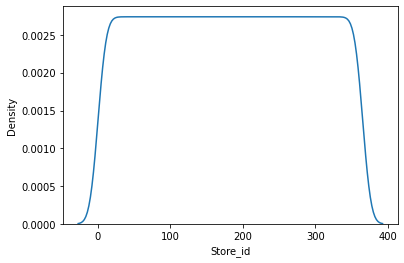

In [ ]:
sns.kdeplot(dataTrain.Store_id)

* This is a uniform distribution

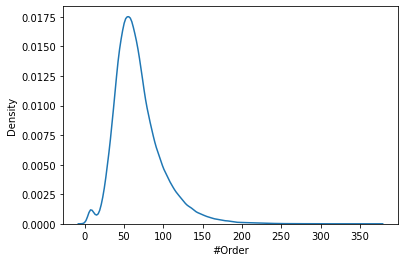

In [ ]:
sns.kdeplot(dataTrain['#Order'])

* There seems to be some outliers
* The plot seems to be right skewed. 

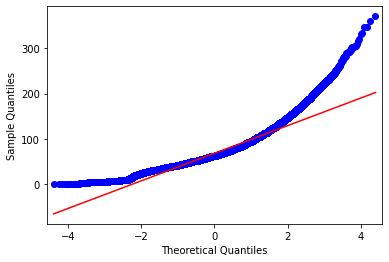

In [ ]:
sm.qqplot(dataTrain['#Order'],line ='s')
py.show()

* This is a right skewed. 
* Need to use log transformation

In [ ]:
order = dataTrain['#Order']
order=pd.DataFrame(order)
order.head()

,#Order
0,9
1,60
2,42
3,23
4,62


In [ ]:
mini=1
if order['#Order'].min()<0:
    mini =  abs(order['#Order'].min())+1
  
order['#Order']= [i+mini for i in order['#Order']]
order['LogOrder'] = order['#Order'].map(lambda x : np.log(x))

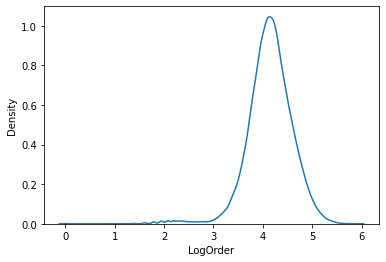

In [ ]:
sns.kdeplot(order.LogOrder)

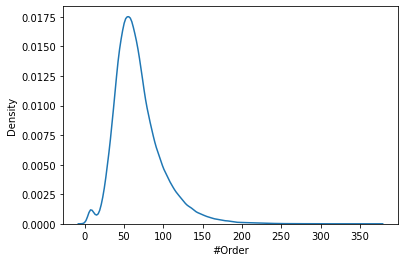

In [ ]:
#dataTrain['#Order']=order['LogOrder']
sns.kdeplot(dataTrain['#Order'])

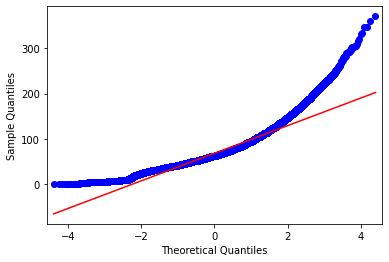

In [ ]:
sm.qqplot(dataTrain['#Order'],line='s')
py.show()

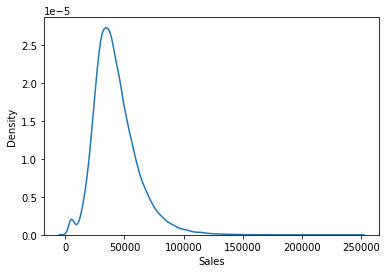

In [ ]:
sns.kdeplot(dataTrain.Sales)

* There seems to be some outliers on the extreme side.
* The plot seems to be right skewed. 

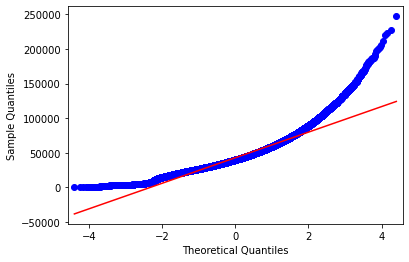

In [ ]:
sm.qqplot(dataTrain.Sales,line ='s')
py.show()

* This is a right skewed. 
* Need to use log transformation

In [ ]:
dataTrain.Holiday=dataTrain.Holiday.map({1:'1',0:'0'})
dataTrain.Holiday.dtype

dtype('O')

In [ ]:
dataTrain.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,day_of_the_week,month_of_the_year,day_of_the_month
0,1,S1,L3,R1,1,Yes,9,7011.84,0,1,1
1,253,S4,L2,R1,1,Yes,60,51789.12,0,1,1
2,252,S3,L2,R1,1,Yes,42,36868.20,0,1,1
3,251,S2,L3,R1,1,Yes,23,19715.16,0,1,1
4,250,S2,L3,R4,1,Yes,62,45614.52,0,1,1


In [ ]:
dataTrain.dtypes

Store_id               int64
Store_Type            object
Location_Type         object
Region_Code           object
Holiday               object
Discount              object
#Order                 int64
Sales                float64
day_of_the_week        int64
month_of_the_year      int64
day_of_the_month       int64
dtype: object

Making dummies of the categorical variables

In [ ]:
dataTrain=pd.get_dummies(dataTrain)
dataTrain.head()

,Store_id,#Order,Sales,day_of_the_week,month_of_the_year,day_of_the_month,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Holiday_0,Holiday_1,Discount_No,Discount_Yes
0,1,9,7011.84,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
1,253,60,51789.12,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
2,252,42,36868.20,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,251,23,19715.16,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
4,250,62,45614.52,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_log_error as msle

In [ ]:
x_order = dataTrain.drop(labels=['Sales','#Order'],axis=1)
y_order = dataTrain['#Order']

In [ ]:
train_x,test_x,train_y,test_y = tts(x_order,y_order,random_state= 45)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((141255, 21), (141255,), (47085, 21), (47085,))

# XGBOOST model for "#Order" Variable 

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse, mean_squared_log_error as msle

In [ ]:
xgb_order = XGBRegressor(random_state=45,n_jobs=-1,objective='reg:squarederror',max_depth=3)

In [ ]:
xgb_order.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=45, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
order_train_pred = xgb_order.predict(train_x)
mse(train_y,order_train_pred,squared=False)

16.685055715627698

In [ ]:
order_test_pred = xgb_order.predict(test_x)
mse(test_y,order_test_pred,squared=False)

16.613844878120474

In [ ]:
# parametersXGBM={
#     'learning_rate':[i/100 for i in range(50,140,2)],
#     'n_estimators':[50,75,100,125,150],
#     'subsample':[i/100.0 for i in range(5,81,5)],
#     'max_depth':[2,3,4,5],
#     'colsample_bylevel':[i/100.0 for i in range(12,80,3)],
#     'colsample_bytree':[i/100.0 for i in range(12,80,3)],
#     'reg_alpha':[i/10 for i in range(1,100,10)]+[i/100 for i in range(1,100,10)]+[i/1000 for i in range(1,100,10)],
#     'min_child_weight':range(1,6)
# }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#randomsearchXGBM_order= RandomizedSearchCV(estimator=xgb_order,param_distributions=parametersXGBM,n_iter=25,cv=5,n_jobs=-1,random_state=45)

In [ ]:
#randomsearchXGBM_order.fit(train_x,train_y)

In [ ]:
#randomsearchXGBM_order.best_params_,randomsearchXGBM_order.best_score_

In [ ]:
#XGBM_ORDER = XGBRegressor(booster='gbtree',n_jobs=-1,objective='reg:squarederror',n_estimators=125,subsample=0.7,learning_rate=1.04,max_depth=5,colsample_bylevel=0.39,colsample_bytree=0.6,reg_alpha=1.1,gamma=0.0,min_child_weight=2,random_state=45)

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression(normalize=True)

In [ ]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction=lr.predict(train_x)

In [ ]:
prediction.min(),prediction.max()

(9.8125, 123.6875)

In [ ]:
test = lr.predict(test_x)

In [ ]:
msle(test_y,np.abs(test))*1000

96.52777640929378

In [ ]:
msle(train_y,np.abs(prediction))*1000

96.80910817663397

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
ORDER = dataTrain['#Order']

dataTrain.drop(labels=['#Order'],axis=1,inplace=True)
dataTrain['#Order']=ORDER
dataTrain.head()

x = dataTrain.drop(labels=['Sales'],axis=1)
y = dataTrain['Sales']
train_x,test_x,train_y,test_y = tts(x,y,random_state= 45)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((141255, 22), (141255,), (47085, 22), (47085,))

In [ ]:
tree =  DecisionTreeRegressor(max_depth=3,random_state=45)

In [ ]:
tree.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=45, splitter='best')

In [ ]:
parameterDT={
    'criterion':['mse','friedman_mse','mae'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6],
    'min_samples_split':[20,30,40,50,60],
    'min_samples_leaf':[20,30,40,50,60],
    'max_features':['sqrt','log2',6,8,10]
}

In [ ]:
randomsearchDT = RandomizedSearchCV(estimator=tree,param_distributions=parameterDT,n_iter=20,n_jobs=-1,random_state=54)

In [ ]:
#randomsearchDT.fit(train_x,train_y)

KeyboardInterrupt: ignored

In [ ]:
#randomsearchDT.best_params_

In [ ]:
predictions = tree.predict(train_x)

In [ ]:
predictions.min()

36.65236514522822

In [ ]:
msle(train_y,predictions)*1000

114.79593634300515

In [ ]:
test = tree.predict(test_x)

In [ ]:
msle(test_y,test)*1000

113.94504976668578

# XGBOOST FOR Sales

In [ ]:
ORDER = dataTrain['#Order']
ORDER

0          9
1         60
2         42
3         23
4         62
          ..
188335    51
188336    90
188337    56
188338    70
188339    47
Name: #Order, Length: 188340, dtype: int64

In [ ]:

dataTrain.drop(labels=['#Order'],axis=1,inplace=True)
dataTrain['#Order']=ORDER
dataTrain.head()


,Store_id,Sales,day_of_the_week,month_of_the_year,day_of_the_month,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Holiday_0,Holiday_1,Discount_No,Discount_Yes,#Order
0,1,7011.84,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,9
1,253,51789.12,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,60
2,252,36868.20,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,42
3,251,19715.16,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,23
4,250,45614.52,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,62


In [ ]:
x = dataTrain.drop(labels=['Sales'],axis=1)
y = dataTrain['Sales']

In [ ]:
train_x,test_x,train_y,test_y = tts(x,y,random_state= 45)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((141255, 22), (141255,), (47085, 22), (47085,))

In [ ]:
train_x.columns

Index(['Store_id', 'day_of_the_week', 'month_of_the_year', 'day_of_the_month',
       'Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4',
       'Location_Type_L1', 'Location_Type_L2', 'Location_Type_L3',
       'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R1',
       'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4', 'Holiday_0',
       'Holiday_1', 'Discount_No', 'Discount_Yes', '#Order'],
      dtype='object')

In [ ]:
xgbSales = XGBRegressor(random_state=45,n_jobs=-1,objective='reg:squarederror',max_depth=3)

In [ ]:
xgbSales.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=45, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
train_prediction=xgbSales.predict(train_x)
msle(train_y,train_prediction)*1000

14.346397803612543

In [ ]:
test_prediction = xgbSales.predict(test_x)
msle(test_y,test_prediction)*1000

14.999394907229664

In [ ]:
parametersXGBM={
    'learning_rate':[0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2],
    'n_estimators':[75,95,100,110,125,135,150],
    'subsample':[0.06,0.08,0.1,0.12,0.14,0.16,0.8,0.2],
    'max_depth':[2,3,4,5],
    'colsample_bylevel':[0.06,0.08,0.1,0.12,0.14,0.16,0.8,0.2],
    'colsample_bytree':[0.06,0.08,0.1,0.12,0.14,0.16,0.8,0.2],
  #  'reg_alpha':[i/10 for i in range(1,100,10)]+[i/100 for i in range(1,100,10)]+[i/1000 for i in range(1,100,10)],
    'min_child_weight':range(1,6)
}

In [ ]:
randomsearchXGBM = RandomizedSearchCV(estimator=XGBRegressor(random_state=45,n_jobs=-1,objective='reg:squarederror'),param_distributions=parametersXGBM,n_iter=50,n_jobs=-1,random_state=45)

In [ ]:
randomsearchXGBM.fit(train_x,train_y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=45...
                                        'colsample_bytree': [0.06, 0.08, 0.1,
                                                             0.12, 0.14, 0.16,
                                

In [ ]:
randomsearchXGBM.best_params_

{'colsample_bylevel': 0.8,
 'colsample_bytree': 0.8,
 'learning_rate': 0.16,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 125,
 'subsample': 0.2}

In [ ]:
XGBM=XGBRegressor(booster='gbtree',n_jobs=-1,objective='reg:squarederror',n_estimators=125,subsample=0.2,learning_rate=0.16,max_depth=3,colsample_bylevel=0.8,colsample_bytree=0.8,reg_alpha=0.001,gamma=0.1,min_child_weight=2,random_state=45)

In [ ]:
XGBM.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
             importance_type='gain', learning_rate=0.16, max_delta_step=0,
             max_depth=3, min_child_weight=2, missing=None, n_estimators=125,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=45, reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.2, verbosity=1)

In [ ]:
train_pred_xgbm=XGBM.predict(train_x)
train_pred.min()

334.92227

In [ ]:
msle(train_y,train_pred)*1000

12.748897493868835

In [ ]:
test_pred_xgbm=XGBM.predict(test_x)

In [ ]:
msle(test_y,XGBM.predict(test_x))*1000

13.063927515987757

In [ ]:
dataTrain.head()

,Store_id,Sales,day_of_the_week,month_of_the_year,day_of_the_month,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Holiday_0,Holiday_1,Discount_No,Discount_Yes,#Order
0,1,7011.84,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,9
1,253,51789.12,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,60
2,252,36868.20,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,42
3,251,19715.16,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,23
4,250,45614.52,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,62


# GBM


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=45)

In [ ]:
gbm.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
msle(train_y,gbm.predict(train_x))*1000

14.704476484562756

In [ ]:
msle(test_y,gbm.predict(test_x))*1000

15.343191417040396

In [ ]:
parametersGBM ={
    'loss':['ls', 'lad', 'huber', 'quantile'],
    'learning_rate':[0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2],
    'n_estimators':[75,95,100,110,125,135,150],
    'subsample':[0.6,0.8,1.0,1.2],
    'max_depth':[3,4,5],
    'min_samples_split':[10,20,30,40,50],
    'min_samples_leaf':[10,20,30,40,50],
    'max_features':['sqrt','log2',6,8,10]
}

In [ ]:
randomsearchGBM=RandomizedSearchCV(estimator=gbm,param_distributions=parametersGBM,n_iter=20,cv=5,n_jobs=-1,random_state=45)

In [ ]:
randomsearchGBM.fit(train_x,train_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [ ]:
randomsearchGBM.best_params_

{'learning_rate': 0.16,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 75,
 'subsample': 1.0}

In [ ]:
GBM = GradientBoostingRegressor(learning_rate=0.16,loss='ls',max_depth=5,max_features=8,min_samples_leaf=50,min_samples_split=50,n_estimators=75)

In [ ]:
GBM.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.16, loss='ls', max_depth=5,
                          max_features=8, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=75,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
train_pred_gbm=GBM.predict(train_x)

In [ ]:
msle(train_y,GBM.predict(train_x))*1000

13.890701006659173

In [ ]:
test_pred_gbm=GBM.predict(test_x)

In [ ]:
msle(test_y,GBM.predict(test_x))*1000

12.874553998399165

# Stacking using XGBM and GBM

In [ ]:
train_prediction={
    'XGBM':train_pred_xgbm,
    'GBM':train_pred_gbm
}
train_prediction = pd.DataFrame(train_prediction)
train_prediction.head()

,XGBM,GBM
0,48831.582031,45890.257386
1,48673.355469,48163.723414
2,31646.009766,31308.518985
3,42506.816406,41244.711322
4,55340.320312,52100.911263


In [ ]:
parametersGBM ={
    'loss':['ls', 'lad', 'huber', 'quantile'],
    'learning_rate':[0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2],
    'n_estimators':[75,95,100,110,125,135,150],
    'subsample':[0.6,0.8,1.0,1.2],
    'max_depth':[3,4,5],
    'min_samples_split':[10,20,30,40,50],
    'min_samples_leaf':[10,20,30,40,50],
    'max_features':['sqrt','log2',6,8,10]
}

In [ ]:
randomsearchStackGBM=RandomizedSearchCV(estimator=gbm,param_distributions=parametersGBM,n_iter=20,cv=5,n_jobs=-1,random_state=45)

In [ ]:
randomsearchStackGBM.fit(train_prediction,train_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [ ]:
randomsearchStackGBM.best_params_

{'learning_rate': 0.08,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [ ]:
GBMSTACK = GradientBoostingRegressor(learning_rate=0.08,loss='ls',max_depth=5,max_features='sqrt',min_samples_leaf=10,min_samples_split=20,n_estimators=100)

In [ ]:
GBMSTACK.fit(train_prediction,train_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.08, loss='ls', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=20,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
msle(train_y,GBMSTACK.predict(train_prediction))*1000

12.35254716750378

In [ ]:
XGBMSTACK=XGBRegressor(random_state=45,n_jobs=-1,objective='reg:squarederror')

In [ ]:
XGBMSTACK.fit(train_prediction,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=45, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
msle(train_y,XGBMSTACK.predict(train_prediction))*1000

12.24956041886205

In [ ]:
parametersXGBM={
    'learning_rate':[0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2],
    'n_estimators':[75,95,100,110,125,135,150],
    'subsample':[0.06,0.08,0.1,0.12,0.14,0.16,0.8,0.2],
    'max_depth':[2,3,4,5],
    'colsample_bylevel':[0.06,0.08,0.1,0.12,0.14,0.16,0.8,0.2],
    'colsample_bytree':[0.06,0.08,0.1,0.12,0.14,0.16,0.8,0.2],
  #  'reg_alpha':[i/10 for i in range(1,100,10)]+[i/100 for i in range(1,100,10)]+[i/1000 for i in range(1,100,10)],
    'min_child_weight':range(1,6)
}

In [ ]:
randomsearchStackXGBM=RandomizedSearchCV(estimator=XGBRegressor(random_state=45,n_jobs=-1,objective='reg:squarederror'),param_distributions=parametersXGBM,n_iter=10,cv=5,n_jobs=-1,random_state=45)

In [ ]:
randomsearchStackXGBM.fit(train_prediction,train_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=45, re...
                                        'colsample_bytree': [0.06, 0.08, 0.1,
                                                             0.12, 0.14, 0.16,
                               

In [ ]:
randomsearchStackXGBM.best_params_

{'colsample_bylevel': 0.8,
 'colsample_bytree': 0.14,
 'learning_rate': 0.06,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 135,
 'subsample': 0.8}

In [ ]:
XGBMStack=XGBRegressor(booster='gbtree',n_jobs=-1,objective='reg:squarederror',n_estimators=135,subsample=0.8,learning_rate=0.06,max_depth=5,colsample_bylevel=0.8,colsample_bytree=0.14,reg_alpha=0.001,gamma=0.1,min_child_weight=1,random_state=45)

In [ ]:
XGBMStack.fit(train_prediction,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.14, gamma=0.1,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=135,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=45, reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [ ]:
msle(train_y,XGBMStack.predict(train_prediction))*1000

12.772678505392312

In [ ]:
test_prediction = {
    'XGBM':test_pred_xgbm,
    'GBM':test_pred_gbm
}
test_prediction = pd.DataFrame(test_prediction)
test_prediction.head()

,XGBM,GBM
0,55019.703125,56465.898546
1,63972.324219,63825.669125
2,43492.121094,42122.360281
3,63885.210938,64104.172679
4,21479.412109,19870.165811


In [ ]:
msle(test_y,XGBMStack.predict(test_prediction))*1000

12.971758542844217

In [ ]:
msle(test_y,GBMSTACK.predict(test_prediction))*1000

13.0000615355489

In [ ]:
msle(test_y,XGBMSTACK.predict(test_prediction))*1000

13.142150294431003

# Test File

In [ ]:
dataTest = pd.read_csv('/content/drive/MyDrive/data/JOBATHON Sept 2021 Supplement Sales Prediction/TEST_FINAL.csv')

In [ ]:
dataTest.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


#Checking Null values

In [ ]:
dataTest.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [ ]:
sales_id = dataTest['ID']

In [ ]:
dataTest.Date = pd.to_datetime(dataTest.Date)
dataTest.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
dtype: object

In [ ]:
dataTest['day_of_the_week']=dataTest.Date.dt.dayofweek

dataTest['month_of_the_year']=dataTest.Date.dt.month

dataTest['day_of_the_month']=dataTest.Date.dt.day

In [ ]:
dataTest.drop(labels=['Date'],axis=1,inplace=True)
dataTest.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,day_of_the_week,month_of_the_year,day_of_the_month
0,T1188341,171,S4,L2,R3,0,No,5,6,1
1,T1188342,172,S1,L1,R1,0,No,5,6,1
2,T1188343,173,S4,L2,R1,0,No,5,6,1
3,T1188344,174,S1,L1,R4,0,No,5,6,1
4,T1188345,170,S1,L1,R2,0,No,5,6,1


In [ ]:
dataTest.Holiday=dataTest.Holiday.map({1:'1',0:'0'})

In [ ]:
dataTest.drop(labels=['ID'],axis=1,inplace=True)

In [ ]:
dataTest.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,day_of_the_week,month_of_the_year,day_of_the_month
0,171,S4,L2,R3,0,No,5,6,1
1,172,S1,L1,R1,0,No,5,6,1
2,173,S4,L2,R1,0,No,5,6,1
3,174,S1,L1,R4,0,No,5,6,1
4,170,S1,L1,R2,0,No,5,6,1


In [ ]:
dataTest = pd.get_dummies(dataTest)

In [ ]:
dataTest.head()

,Store_id,day_of_the_week,month_of_the_year,day_of_the_month,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Holiday_0,Holiday_1,Discount_No,Discount_Yes
0,171,5,6,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0
1,172,5,6,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
2,173,5,6,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
3,174,5,6,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0
4,170,5,6,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
#dataTest.drop(labels=['Order'],axis=1,inplace=True)

In [ ]:
dataTest["#Order"] = xgb_order.predict(dataTest)

In [ ]:
dataTest.head()

,Store_id,day_of_the_week,month_of_the_year,day_of_the_month,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Holiday_0,Holiday_1,Discount_No,Discount_Yes,#Order
0,171,5,6,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,108.813835
1,172,5,6,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,66.902023
2,173,5,6,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,129.719574
3,174,5,6,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,63.817745
4,170,5,6,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,65.224037


#XGBOOST for Test file

In [ ]:
predXGBtestfile=XGBM.predict(dataTest)
predXGBtestfile

array([67934.75 , 43834.36 , 77934.17 , ..., 43653.055, 33168.625,
       27088.33 ], dtype=float32)

In [ ]:
predXGBM = pd.DataFrame(sales_id,columns=['ID'])
predXGBM['Sales'] = predXGBtestfile
predXGBM.reset_index(inplace=True,drop=True)
predXGBM.head()

,ID,Sales
0,T1188341,67934.750000
1,T1188342,43834.359375
2,T1188343,77934.171875
3,T1188344,43723.582031
4,T1188345,43385.261719


In [ ]:
predXGBM.to_csv('/content/drive/MyDrive/data/JOBATHON Sept 2021 Supplement Sales Prediction/XGBM-JOBATHON.csv',index=False)

# GBM

In [ ]:
predGBMtestfile=GBM.predict(dataTest)
predGBMtestfile

array([68103.82018331, 44542.40145573, 79221.0071816 , ...,
       43751.73986916, 33752.32476364, 26727.95991989])

In [ ]:
predGBM = pd.DataFrame(sales_id,columns=['ID'])
predGBM['Sales'] = predGBMtestfile
predGBM.reset_index(inplace=True,drop=True)
predGBM.head()

,ID,Sales
0,T1188341,68103.820183
1,T1188342,44542.401456
2,T1188343,79221.007182
3,T1188344,44586.650289
4,T1188345,43714.648284


In [ ]:
predGBM.to_csv('/content/drive/MyDrive/data/JOBATHON Sept 2021 Supplement Sales Prediction/GBM-JOBATHON.csv',index=False)

# XGBM stacking

In [ ]:
test_file_prediction ={
    'XGBM':predXGBtestfile,
    'GBM':predGBMtestfile
}
test_file_prediction = pd.DataFrame(test_file_prediction)
test_file_prediction.head()

,XGBM,GBM
0,67934.750000,68103.820183
1,43834.359375,44542.401456
2,77934.171875,79221.007182
3,43723.582031,44586.650289
4,43385.261719,43714.648284


In [ ]:
test_stack = XGBMStack.predict(test_file_prediction)

In [ ]:
predStack = pd.DataFrame(sales_id,columns=['ID'])
predStack['Sales'] = test_stack
predStack.reset_index(inplace=True,drop=True)
predStack.head()

,ID,Sales
0,T1188341,68683.593750
1,T1188342,44047.640625
2,T1188343,79245.648438
3,T1188344,43878.804688
4,T1188345,43546.992188


In [ ]:
predStack.to_csv('/content/drive/MyDrive/data/JOBATHON Sept 2021 Supplement Sales Prediction/StackGBM-JOBATHON.csv',index=False)